<div style="text-align: center;">
    <h1>Applied Data Science</h1>
    <h3><em>Spring 2025</em></h3>
    <h2>Assignment 4 - Feature Engineering</h2>
    <hr style="width:60%;">
    <h3>AmirReza Azari</h3>
    <p><em>Student ID: 99101087</em></p>
</div>

---

## About Dataset

In this assignment I will work on the [Ames Iowa Housing Data](https://www.kaggle.com/datasets/marcopale/housing) dataset. The Ames Housing dataset contains 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa with the goal of predicting the selling price.

## Ames Housing Dataset - Column Descriptions

### 🏡 General Property Features
- **Id** → Unique property ID
- **MSSubClass** → Building class type
- **MSZoning** → General zoning classification
- **LotFrontage** → Linear feet of street connected to property
- **LotArea** → Lot size in square feet

### 📍 Location Features
- **Neighborhood** → Neighborhood name
- **Street** → Type of street access
- **Alley** → Type of alley access (if any)

### 🏠 Building & Design Features
- **OverallQual** → Overall material and finish quality (1-10)
- **OverallCond** → Overall condition rating (1-10)
- **YearBuilt** → Year house was built
- **YearRemodAdd** → Year of remodeling/addition

### 🏗️ Exterior & Construction Features
- **Exterior1st** → Exterior covering type (e.g., Vinyl, Brick, Wood)
- **Exterior2nd** → Second exterior material
- **RoofStyle** → Roof design type (e.g., Gable, Hip)
- **RoofMatl** → Roof material
- **Foundation** → Foundation type (e.g., Poured Concrete, Slab)

### 🏠 Interior & Room Features
- **TotalBsmtSF** → Total basement area in square feet
- **Heating** → Heating type
- **HeatingQC** → Heating quality rating
- **CentralAir** → Central AC (Yes/No)
- **Electrical** → Electrical system type
- **1stFlrSF** → First floor square footage
- **2ndFlrSF** → Second floor square footage
- **GrLivArea** → Above-ground living area in square feet
- **BsmtFullBath** → Number of full bathrooms in the basement
- **BsmtHalfBath** → Number of half bathrooms in the basement
- **FullBath** → Number of full bathrooms above ground (sink, toilet, shower, bathtub)
- **HalfBath** → Number of half bathrooms above ground (sink, toilet only)
- **BedroomAbvGr** → Number of bedrooms above ground
- **KitchenAbvGr** → Number of kitchens above ground
- **TotRmsAbvGrd** → Total rooms above ground (excluding bathrooms)
- **Fireplaces** → Number of fireplaces

### 🚗 Garage & Parking
- **GarageType** → Type of garage (Attached, Detached, Built-in, etc.)
- **GarageYrBlt** → Year garage was built
- **GarageFinish** → Interior finish of the garage
- **GarageCars** → Size of garage in car capacity
- **GarageArea** → Size of garage in square feet

### 🌱 Outdoor & Miscellaneous Features
- **WoodDeckSF** → Wood deck area in square feet
- **OpenPorchSF** → Open porch area in square feet
- **EnclosedPorch** → Enclosed porch area in square feet
- **3SsnPorch** → Three-season porch area
- **PoolArea** → Pool area in square feet
- **Fence** → Fence quality
- **MiscFeature** → Miscellaneous feature (e.g., Shed, Tennis Court)

### 💰 Financial & Sale Features
- **MoSold** → Month sold
- **YrSold** → Year sold
- **SaleType** → Type of sale (e.g., Normal, Foreclosure)
- **SaleCondition** → Sale condition (e.g., Partial, Abnormal Sale)
- **SalePrice** → **Target variable** (House price)



Loading the dataset:

In [1]:
# First, let's import the libraries we'll need later
import pandas as pd
import io
import os
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline
sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
%cd /content/gdrive/My Drive/Kaggle

/content/gdrive/My Drive/Kaggle


In [5]:
!kaggle datasets download -d marcopale/housing

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/cli.py", line 68, in main
    out = args.func(**command_args)
          ^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 1734, in dataset_download_cli
    with self.build_kaggle_client() as kaggle:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/kaggle/api/kaggle_api_extended.py", line 688, in build_kaggle_client
    username=self.config_values['username'],
             ~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^
KeyError: 'username'


In [6]:
!unzip \*.zipy

unzip:  cannot find or open *.zipy, *.zipy.zip or *.zipy.ZIP.

No zipfiles found.


In [7]:
df = pd.read_csv('AmesHousing.csv')

## First, EDA and Data Cleaning:

In [8]:
df.shape

(2930, 82)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [10]:
df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [11]:
dtypes = df.dtypes.to_frame().reset_index()  # Convert dtypes to a DataFrame with column names
dtypes.columns = ['col', 'dtype']  # Rename columns for clarity
print('Df dtypes:')  # Print a header before displaying dtype counts
dtypes.groupby('dtype').size()  # Group by dtype and count occurrences

Df dtypes:


,0
dtype,
int64,28
float64,11
object,43


In [12]:
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [13]:
df.isna().sum()[df.isna().sum() > 0].sort_values(ascending=False)  # Count missing values, filter columns with NaNs, and sort in descending order

,0
Pool QC,2917
Misc Feature,2824
Alley,2732
Fence,2358
Mas Vnr Type,1775
Fireplace Qu,1422
Lot Frontage,490
Garage Qual,159
Garage Cond,159
Garage Yr Blt,159


There is no point in removing the columns with a lot of nans for the following reasons:

Removing the columns is usually associated with underreported data, which is not the case here. Few values in the pool column just means that there are few houses with pools.
These features might still be important. For example, presence of fences on the property would positively reflect on its evaluation.

Now, little plotting and after, main task :).

<Axes: >

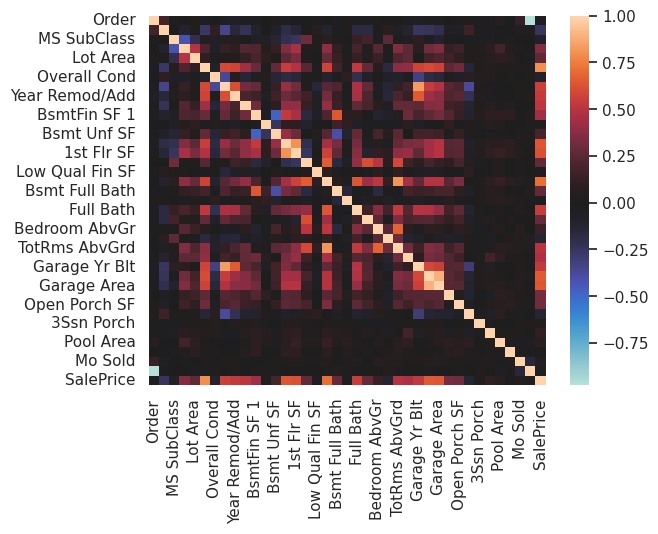

In [14]:
sns.heatmap(df.select_dtypes(exclude='object').corr(), center=0)

In [15]:
def get_corr_list(df, threshold=0.6):  # Define function to find highly correlated variable pairs
    corr = df.corr().unstack().to_frame().reset_index()  # Compute correlation, unstack to pairs, and convert to DataFrame
    corr.columns = ['var1', 'var2', 'corr']  # Rename columns for clarity

    corr = corr[corr['var1'] != corr['var2']]  # Remove self-correlations (where var1 == var2)

    corr['abs_corr'] = corr['corr'].abs()  # Create a column for absolute correlation values
    corr = corr.sort_values(by='abs_corr', ascending=False)  # Sort by absolute correlation in descending order
    corr = corr[corr['abs_corr'] > threshold]  # Filter correlations above the threshold

    corr = corr.iloc[::2]  # Remove mirrored duplicate pairs
    return corr  # Return the filtered correlation DataFrame

get_corr_list(df.select_dtypes(exclude='object'))  # Call function on numerical columns only

,var1,var2,corr,abs_corr
1443,Yr Sold,Order,-0.975993,0.975993
1119,Garage Area,Garage Cars,0.889676,0.889676
1021,Garage Yr Blt,Year Built,0.834849,0.834849
687,Gr Liv Area,TotRms AbvGrd,0.807772,0.807772
559,1st Flr SF,Total Bsmt SF,0.800720,0.800720
233,Overall Qual,SalePrice,0.799262,0.799262
1499,SalePrice,Gr Liv Area,0.706780,0.706780
882,Bedroom AbvGr,TotRms AbvGrd,0.672647,0.672647
678,Gr Liv Area,2nd Flr SF,0.655251,0.655251
338,Year Remod/Add,Garage Yr Blt,0.652310,0.652310


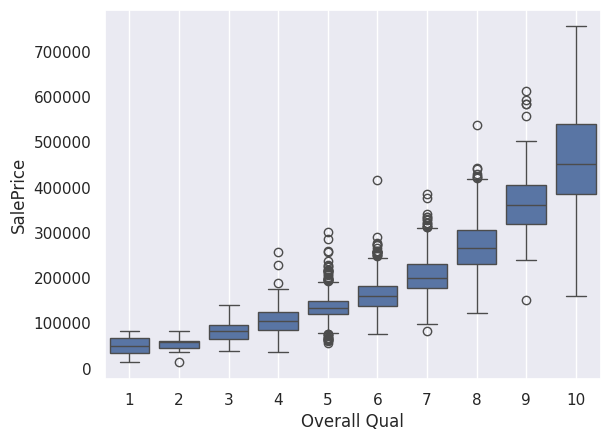

In [16]:
sns.boxplot(df, y='SalePrice', x='Overall Qual')
plt.grid()

<Axes: xlabel='MS SubClass', ylabel='SalePrice'>

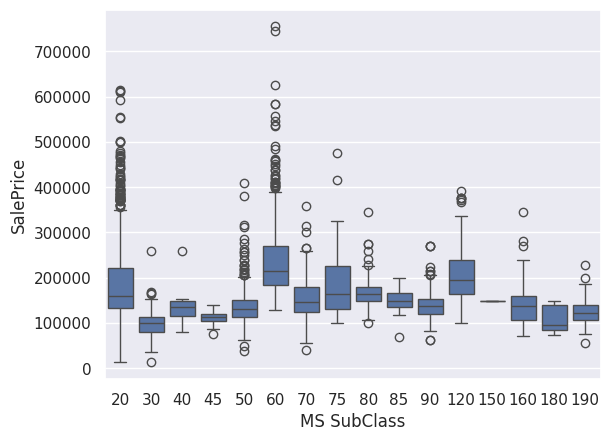

In [17]:
sns.boxplot(df, y='SalePrice', x='MS SubClass')

<Axes: xlabel='Gr Liv Area', ylabel='SalePrice'>

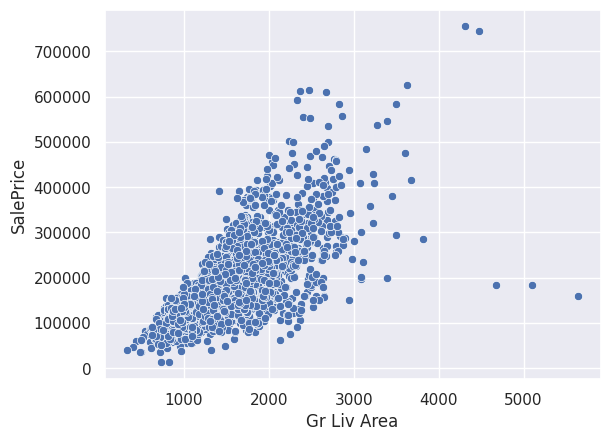

In [18]:
sns.scatterplot(df, y='SalePrice', x='Gr Liv Area')

<Axes: xlabel='Year Built', ylabel='SalePrice'>

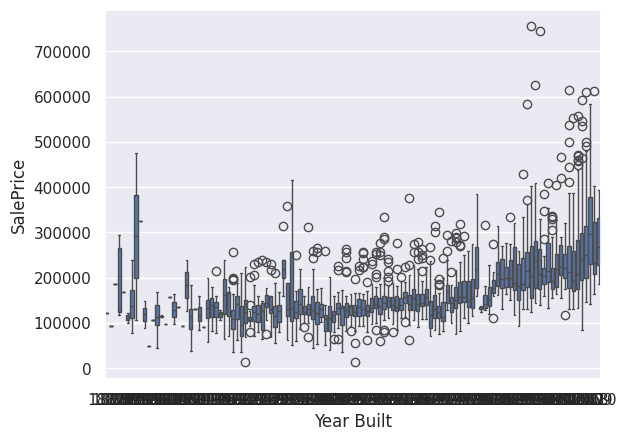

In [19]:
sns.boxplot(df, y='SalePrice', x='Year Built')

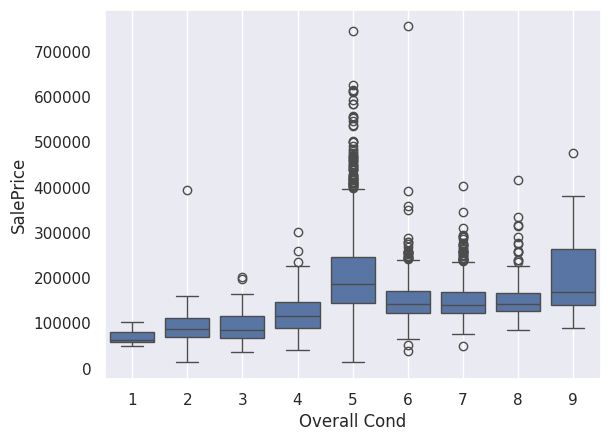

In [20]:
sns.boxplot(df, y='SalePrice', x='Overall Cond')
plt.grid()

### Ratio:

In [21]:
df['Price_Per_Quality'] = df['SalePrice'] / df['Overall Qual']

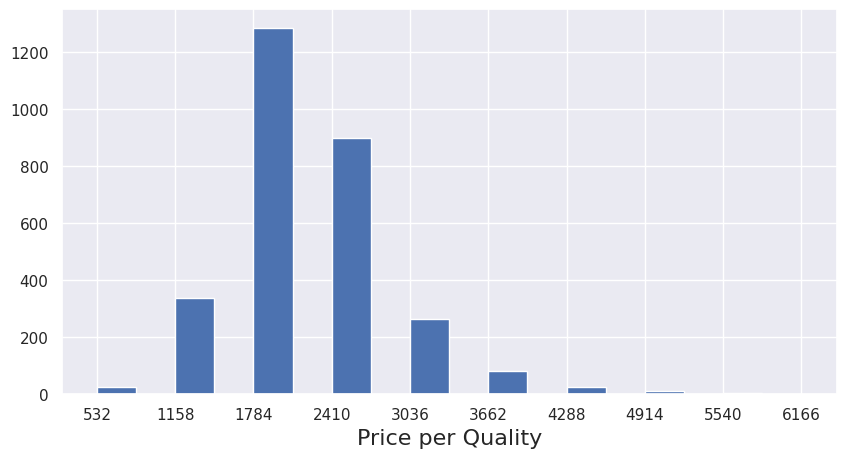

In [22]:
no_bins = 10  # Define the number of bins for the histogram

min_bin_value = int(df['Price_Per_Quality'].div(12).min())  # Compute the minimum bin value by dividing by 12
max_bin_value = int(df['Price_Per_Quality'].div(12).max()) + 1  # Compute the maximum bin value and add 1 to include the upper bound

bin_width = int((max_bin_value - min_bin_value) / no_bins)  # Calculate the width of each bin
predefined_bins = list(range(min_bin_value, max_bin_value, bin_width))  # Create a list of bin edges

df['Price_Per_Quality'].div(12).hist(width=int(bin_width/2), bins=predefined_bins, figsize=(10,5))
# Plot the histogram with specified bin width, bin edges, and figure size

plt.xlabel('Price per Quality', fontsize=16)  # Label the x-axis
plt.xticks(predefined_bins)  # Set x-axis ticks to predefined bin edges
plt.show()

In [23]:
df['Price_Per_Area'] = df['SalePrice'] / df['Gr Liv Area']

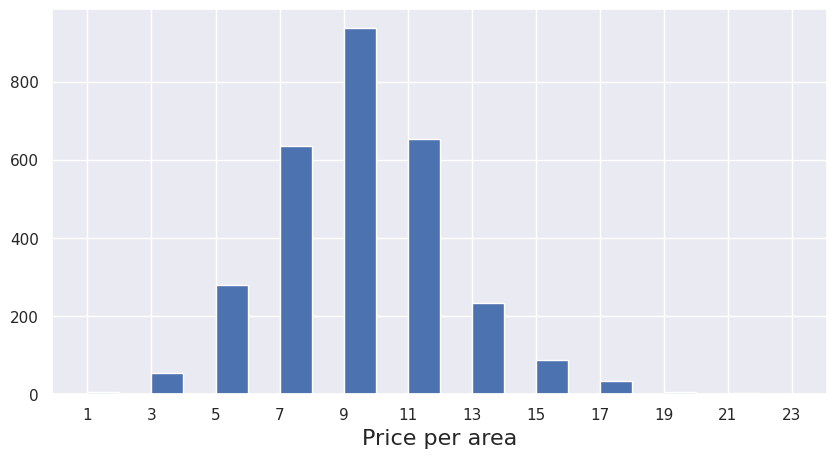

In [24]:
no_bins = 10
min_bin_value = int(df['Price_Per_Area'].div(12).min())
max_bin_value = int(df['Price_Per_Area'].div(12).max()) + 1
bin_width = int((max_bin_value-min_bin_value) / no_bins)
predefined_bins = list(range(min_bin_value, max_bin_value, bin_width))

df['Price_Per_Area'].div(12).hist(width=int(bin_width/2),bins=predefined_bins,figsize=(10,5))

plt.xlabel('Price per area', fontsize=16)
plt.xticks(predefined_bins)
plt.show()

In [25]:
df['Price_Per_Class'] = df['SalePrice'] / df['MS SubClass']

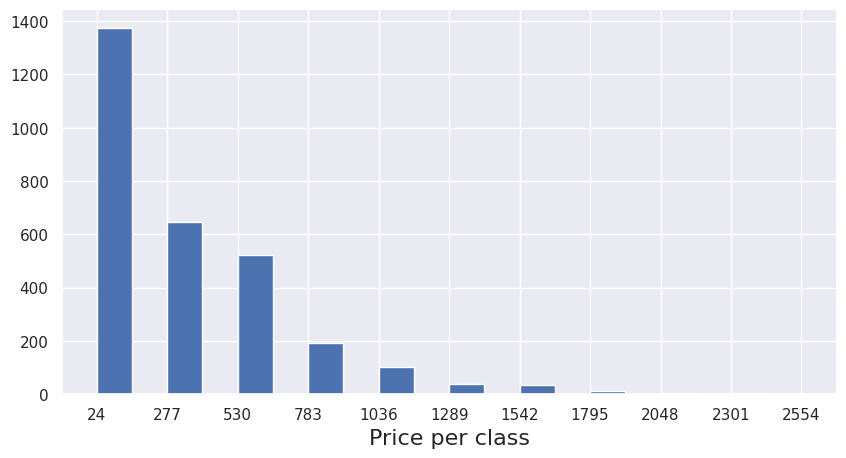

In [26]:
no_bins = 10
min_bin_value = int(df['Price_Per_Class'].div(12).min())
max_bin_value = int(df['Price_Per_Class'].div(12).max()) + 1
bin_width = int((max_bin_value-min_bin_value) / no_bins)
predefined_bins = list(range(min_bin_value, max_bin_value, bin_width))

df['Price_Per_Class'].div(12).hist(width=int(bin_width/2),bins=predefined_bins,figsize=(10,5))

plt.xlabel('Price per class', fontsize=16)
plt.xticks(predefined_bins)
plt.show()

### Binnig:

In [27]:
max_lot = df['Lot Area'].max()  # Get the maximum lot area
min_lot = df['Lot Area'].min()  # Get the minimum lot area

number_of_bins = 25  # Define the total number of bins
ref = (max_lot - min_lot) // number_of_bins  # Calculate bin width

bins = [min_lot + i * ref for i in range(7)]  # Create bin edges (only up to 7 bins instead of 25)
labels = [i for i in range(1, 7)]  # Define labels for bins

df['Binned_Lot_Area'] = pd.cut(df['Lot Area'], bins=bins, labels=labels)  # Apply binning to 'Lot Area'

In [28]:
df[['SalePrice', 'Lot Area', 'Binned_Lot_Area']]

,SalePrice,Lot Area,Binned_Lot_Area
0,215000,31770,4
1,105000,11622,2
2,172000,14267,2
3,244000,11160,2
4,189900,13830,2
...,...,...,...
2925,142500,7937,1
2926,131000,8885,1
2927,132000,10441,2
2928,170000,10010,2


In [29]:
df['Binned_Lot_Area'].value_counts()

,count
Binned_Lot_Area,
1,1660
2,1158
3,72
4,13
5,8
6,7


### Function of a column:

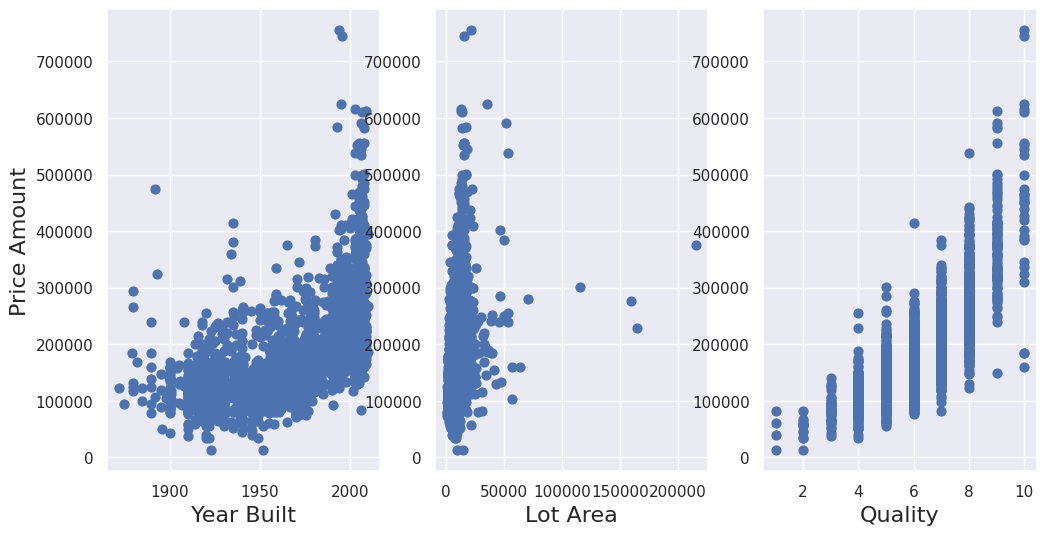

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3)

# Plot the variables
df.plot(ax=axes[0], kind = 'scatter', x='Year Built',y='SalePrice',figsize=(12,6),stacked=True,s=40)
df.plot(ax=axes[1], kind = 'scatter', x='Lot Area',y='SalePrice',figsize=(12,6),stacked=True,s=40)
df.plot(ax=axes[2], kind = 'scatter', x='Overall Qual',y='SalePrice',figsize=(12,6),stacked=True,s=40)

# Now let's setup the labels, titles and format y axis as percentages
axes[0].set_xlabel('Year Built',fontsize=16)
axes[0].set_ylabel('Price Amount',fontsize=16)

axes[1].set_xlabel('Lot Area',fontsize=16)
axes[1].set_ylabel('',fontsize=16)

axes[2].set_xlabel('Quality',fontsize=16)
axes[2].set_ylabel('',fontsize=16)


plt.show()

In [31]:
import math

df['Year_Built_Func'] = df.apply(lambda x: math.pow(x['Year Built'], 0.5), axis=1)
# Apply square root transformation to the 'Year Built' column using math.pow

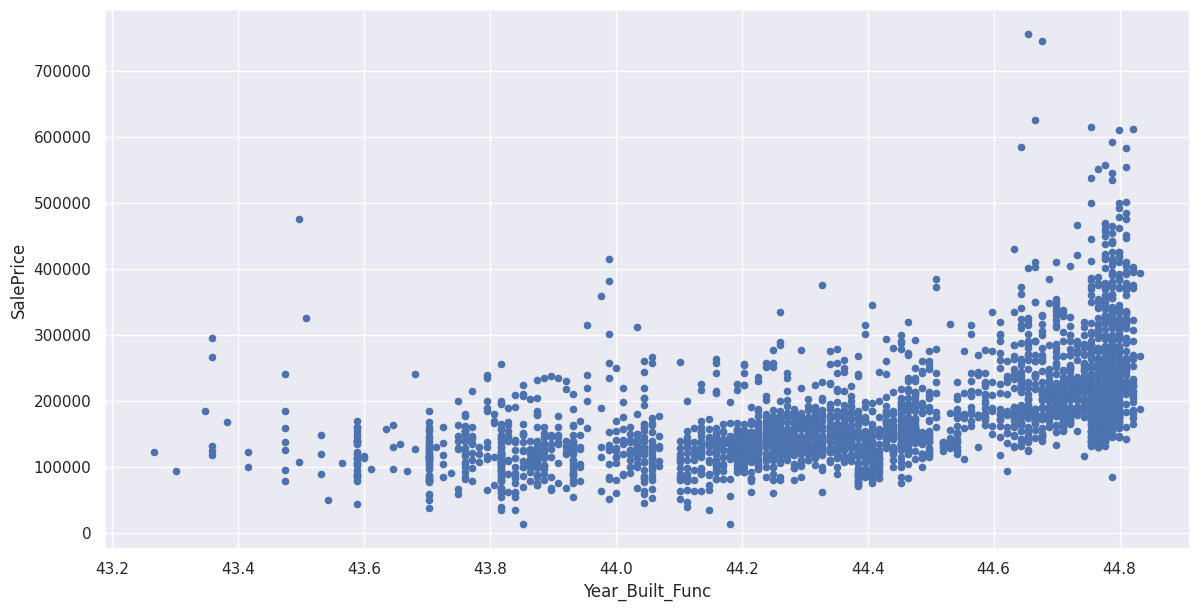

In [32]:
df.plot(kind = 'scatter', x='Year_Built_Func',y='SalePrice',figsize=(14,7),stacked=True)
plt.show()

This dataset has not potential to use this way (function of a column) in a good way. I just did it for the assignment.

### Combining Columns:

Year Remod/Add:

Remodel date (same as construction date if no remodeling or additions).

In [33]:
df[['Year Built', 'Year Remod/Add']]

,Year Built,Year Remod/Add
0,1960,1960
1,1961,1961
2,1958,1958
3,1968,1968
4,1997,1998
...,...,...
2925,1984,1984
2926,1983,1983
2927,1992,1992
2928,1974,1975


In [34]:
df['Diff_Built_Remode'] = -1 * (df['Year Built'] - df['Year Remod/Add'])

In [35]:
df['Diff_Built_Remode'].value_counts()

,count
Diff_Built_Remode,
0,1569
1,434
30,38
40,32
25,27
...,...
66,1
110,1
64,1


In [36]:
df['Yr Sold'].value_counts()

,count
Yr Sold,
2007,694
2009,648
2006,625
2008,622
2010,341


In [37]:
df['Dif_between_built_and_sold'] = df['Yr Sold'] - df['Year Built']

In [38]:
df[['Year Built', 'Year Remod/Add', 'Yr Sold','Diff_Built_Remode', 'Dif_between_built_and_sold']]

,Year Built,Year Remod/Add,Yr Sold,Diff_Built_Remode,Dif_between_built_and_sold
0,1960,1960,2010,0,50
1,1961,1961,2010,0,49
2,1958,1958,2010,0,52
3,1968,1968,2010,0,42
4,1997,1998,2010,1,13
...,...,...,...,...,...
2925,1984,1984,2006,0,22
2926,1983,1983,2006,0,23
2927,1992,1992,2006,0,14
2928,1974,1975,2006,1,32


### Datetime:

This dataset has no any columns for date. So, I talked to Mr. Salavati and he accepts to replace 'create new column' to 'datetime'.

### New Column:

In [39]:
df['Remode'] = df['Diff_Built_Remode'].apply(lambda x: 'No' if x == 0 else 'Yes')

In [40]:
df['Remode'].value_counts()

,count
Remode,
No,1569
Yes,1361


### Count:

In [41]:
df['Overall Qual'].value_counts()

,count
Overall Qual,
5,825
6,732
7,602
8,350
4,226
9,107
3,40
10,31
2,13


In [42]:
df['Overall Cond'].value_counts()

,count
Overall Cond,
5,1654
6,533
7,390
8,144
4,101
3,50
9,41
2,10
1,7


In [43]:
df['Total_Quality'] = df[['Overall Cond','Overall Qual']].sum(axis=1)

In [44]:
df['Valid/Invalid'] = df['Total_Quality'].apply(lambda x: 'No' if x < 10 else 'Yes')

In [45]:
df[['Overall Cond', 'Overall Qual', 'Total_Quality', 'Valid/Invalid']]

,Overall Cond,Overall Qual,Total_Quality,Valid/Invalid
0,5,6,11,Yes
1,6,5,11,Yes
2,6,6,12,Yes
3,5,7,12,Yes
4,5,5,10,Yes
...,...,...,...,...
2925,6,6,12,Yes
2926,5,5,10,Yes
2927,5,5,10,Yes
2928,5,5,10,Yes


In [46]:
df['Valid/Invalid'].value_counts()

,count
Valid/Invalid,
Yes,2682
No,248


### Aggregation:

In [47]:
df['Avg_Quality_Group'] = df['Total_Quality'].groupby(df['MS SubClass']).transform('mean')

In [48]:
df['Avg_Quality_Group_Ratio'] = df['Total_Quality'] / df['Avg_Quality_Group']

In [49]:
df[['Total_Quality', 'MS SubClass', 'Avg_Quality_Group', 'Avg_Quality_Group_Ratio']]

,Total_Quality,MS SubClass,Avg_Quality_Group,Avg_Quality_Group_Ratio
0,11,20,11.602410,0.948079
1,11,20,11.602410,0.948079
2,12,20,11.602410,1.034268
3,12,20,11.602410,1.034268
4,10,60,12.306087,0.812606
...,...,...,...,...
2925,12,80,11.771186,1.019438
2926,10,20,11.602410,0.861890
2927,10,85,11.375000,0.879121
2928,10,20,11.602410,0.861890


### Feature Selection:

<Axes: ylabel='Feature'>

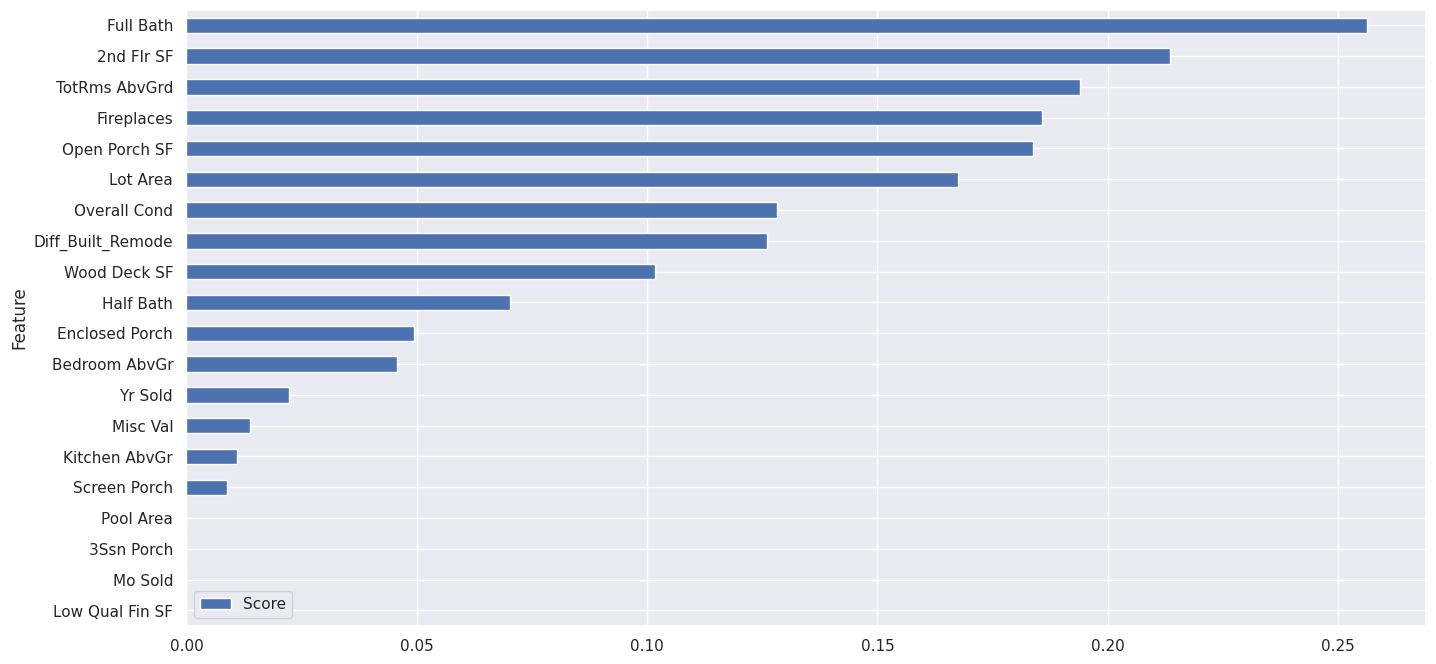

In [50]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression  # Import feature selection tools

df_int = df.select_dtypes(include=['int64', 'int32'])  # Select only integer columns
target = df_int.pop('SalePrice')  # Remove 'SalePrice' as the target variable
df_int = df_int.drop(columns=['PID'])  # Drop 'PID' column since it's an identifier

selector = SelectKBest(score_func=mutual_info_regression, k='all')  # Initialize SelectKBest with mutual information
selector.fit(df_int, target)  # Fit selector to the data

feature_scores = pd.DataFrame({'Feature': df_int.columns, 'Score': selector.scores_})  # Create DataFrame of feature scores
feature_scores.sort_values(by=['Score'], inplace=True)  # Sort features by score in ascending order

feature_scores[0:20].plot(x='Feature', y='Score', kind='barh', figsize=(16,8))  # Plot top 20 features as a horizontal bar chart

### Principal Component Analysis:

In [51]:
from sklearn.preprocessing import StandardScaler
normalized_df = StandardScaler().fit_transform(df_int)

In [52]:
from sklearn.decomposition import PCA  # Import PCA for dimensionality reduction

pca = PCA(n_components=25)  # Initialize PCA with 25 components
principalComponents = pca.fit_transform(normalized_df)  # Apply PCA transformation to normalized data

df_pca = pd.DataFrame(data=normalized_df)  # Incorrect: This should store principal components, not original data
df_pca.head()  # Display the first few rows of the DataFrame

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,-1.731460,-0.877005,2.744381,-0.067254,-0.506718,-0.375537,-1.163488,1.267003,-0.783185,-0.101005,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.448057,1.678499,-0.537292,0.447923,-0.384544
1,-1.730277,-0.877005,0.187097,-0.776079,0.393091,-0.342468,-1.115542,-0.672643,-0.783185,-0.101005,...,-0.358838,-0.103134,1.854530,-0.063031,-0.089422,-0.079602,1.678499,-0.537292,0.414904,-0.384544
2,-1.729095,-0.877005,0.522814,-0.067254,0.393091,-0.441674,-1.259380,0.432445,-0.783185,-0.101005,...,-0.358838,-0.103134,-0.285354,-0.063031,21.985725,-0.079602,1.678499,-0.537292,0.513959,0.199851
3,-1.727913,-0.877005,0.128458,0.641571,-0.506718,-0.110988,-0.779919,2.425687,-0.783185,-0.101005,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-0.816513,1.678499,-0.537292,0.183776,0.199851
4,-1.726731,0.061285,0.467348,-0.776079,-0.506718,0.848000,0.658466,-0.590974,0.853432,-0.101005,...,-0.358838,-0.103134,-0.285354,-0.063031,-0.089422,-1.184969,1.678499,-0.495674,-0.773756,-0.968940


Now that we have all the components, we can check how many components to keep, based on the amount of "details" the components provide us with about the data:

Text(0.5, 1.0, ' ')

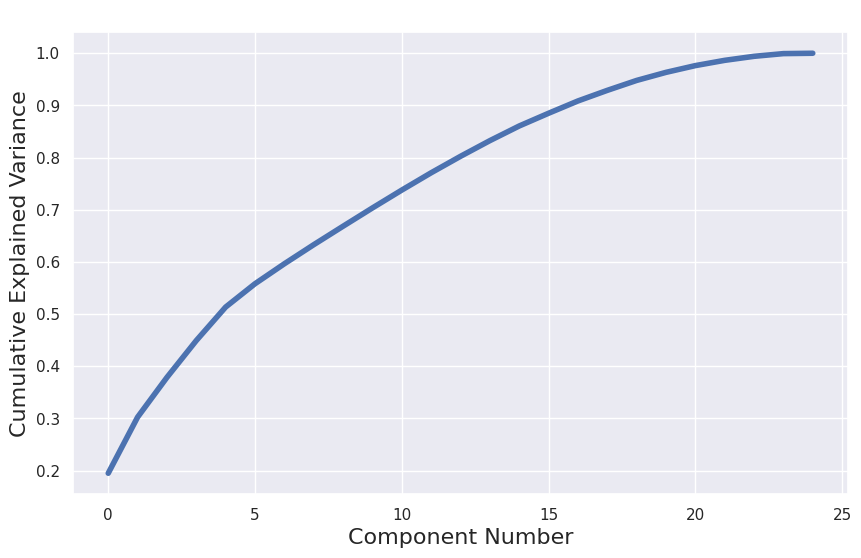

In [53]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_),lw=4)
plt.xlabel('Component Number',fontsize=16)
plt.ylabel('Cumulative Explained Variance',fontsize=16)
plt.title(' ')

---

# **Feature Engineering: "Nice to Have" vs. "Must-Have"**

## **"Nice to Have" Situations**
Feature engineering can enhance model performance but is not always critical. It is a "nice to have" when:

1. **Simple Models Perform Well**  
   - If a basic model (e.g., linear regression, decision trees) achieves high accuracy with raw data, additional feature engineering may offer only marginal improvements.

2. **Deep Learning Models Handle Feature Extraction**  
   - Neural networks (e.g., CNNs, transformers) can automatically learn hierarchical features, reducing the need for manual feature engineering.

3. **Low-Stakes Predictions**  
   - If the model is used for non-critical applications (e.g., basic recommendations, user engagement scoring), extensive feature engineering might not be necessary.

4. **Limited Resources & Time Constraints**  
   - If rapid deployment is the priority, using automated feature selection methods may be more practical than manual engineering.

---

## **"Must-Have" Situations**
Feature engineering is essential when:

1. **Data is Noisy, Sparse, or Unstructured**  
   - Raw data often has missing values, outliers, or inconsistencies. Creating meaningful features improves the signal-to-noise ratio.

2. **Model Performance is Suboptimal**  
   - If the model struggles to generalize or underperforms, new features can reveal hidden patterns and improve accuracy.

3. **Domain Knowledge Provides an Edge**  
   - In areas like finance, healthcare, or cybersecurity, domain-specific transformations (e.g., risk scores, ratios, or derived variables) are crucial.

4. **Small or Imbalanced Datasets**  
   - When data is limited, extracting useful features (e.g., aggregations, embeddings) helps models learn better without requiring massive amounts of data.

5. **Regulatory or Interpretability Requirements**  
   - In industries like banking, healthcare, and law, models must be explainable. Hand-crafted features (e.g., credit scores, risk metrics) ensure interpretability and compliance.

6. **Non-Tabular Data (Text, Images, Time Series, etc.)**  
   - In NLP, converting raw text into TF-IDF, word embeddings, or sentiment scores is crucial. Similarly, in time-series data, extracting trends, seasonality, or lags can make models more effective.
